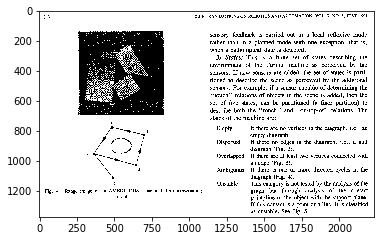

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread("bitmap.pbm", cv2.IMREAD_GRAYSCALE)
largura_imagem, altura_imagem = img.shape
import imageio

plt.imshow(img, "gray")

65


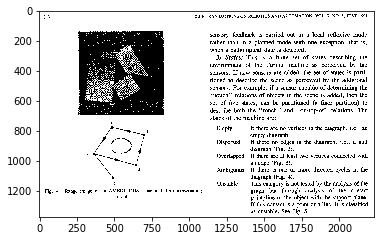

In [40]:
imgOriginal = img.copy()
img2 = cv2.bitwise_not(imgOriginal)
kernel = np.ones((1,100),np.uint8)
dilation = cv2.dilate(img2,kernel,iterations = 1)
erosion = cv2.erode(dilation,kernel,iterations = 1)

kernel2 = np.ones((200,1),np.uint8)
dilation2 = cv2.dilate(img2,kernel2,iterations = 1)
erosion2 = cv2.erode(dilation2,kernel2,iterations = 1)

imgOut = cv2.bitwise_and(erosion, erosion2)

kernel = np.ones((1,30),np.uint8)

imgOut = cv2.morphologyEx(imgOut, cv2.MORPH_CLOSE, kernel)
_, contours, hierarchy = cv2.findContours(imgOut, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


contornos = cv2.drawContours(imgOriginal.copy(), contours, -1, (0,255,0), 3)



print (len(contours[0]))



plt.imshow(imgOriginal,"gray")

imageio.imwrite('resultados/teste.png', imgOriginal)

0.0
0.0
0.0
0.0
0.0
0.0
0.35522736105713176
0.09375
0.0
1.0
0.2991512499171142
0.0
0.0
0.0
0.0
0.3253968253968254
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.09944751381215469
0.0
0.0
0.0
0.0
0.08561020036429873
0.0
0.0
0.0
0.0
0.08211396109485282
0.0
0.0
0.0
0.0
0.0
0.0
0.14242919389978215
0.1553367738107321
0.13967225609756098
0.0
0.0
0.0
1.0
0.03099740452354468
0.013702995538559592
0.0
0.01742903368142374
0.03328544061302682
0.029780114722753347
0.0127868068833652
0.0134223117602619
0.0
0.0
0.55
0.011843361986628463
0.016219794769943726
0.0
0.02088372843089824
0.01498565965583174
0.008173996175908221
0.4679892300213156
0.0
0.36961451247165533
0.010156521739130436
292


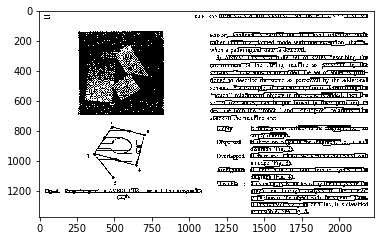

In [45]:
rects = []

for c in contours:
        #peri = cv2.arcLength(c, True)
        #approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        x, y, w, h = cv2.boundingRect(c)
        # if height is enough
        # create rectangle for bounding
        rect = (x, y, w, h)
        #print(x,y,w,h)
        rects.append(rect)
        #cv2.rectangle(roi_copy, (x, y), (x+w, y+h), (0, 255, 0), 1);

#print(len(rects))
cont = 0
for r in rects:
    x, y, w, h = r
    total = (w*h)
    pretos = np.sum(imgOriginal[x:x+w, y:y+h] == 0)
    print(pretos/total)
    if (pretos/total  < 0.20 and pretos/total > 0.0):
        contornos = cv2.drawContours(imgOriginal, contours, cont, (0,255,0), 3)
    cont += 1
print(pretos)


plt.imshow(imgOriginal,"gray")
imageio.imwrite('resultados/teste.png', imgOriginal)